# 1

In [1]:
import pandas as pd
import numpy as np

energy = pd.read_excel('En_In.xls', skiprows=17, skipfooter=38, usecols=[2, 3, 4, 5], 
                       names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'])
energy.replace('...', np.nan, inplace=True)
energy['Energy Supply'] *= 1e6
energy.head()


,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10.0,78.669280
1,Albania,1.020000e+08,35.0,100.000000
2,Algeria,1.959000e+09,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.000000e+06,121.0,88.695650


# 2

In [2]:
energy['Country'] = energy['Country'].replace({
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
})
energy['Country'] = energy['Country'].str.replace(r" \(.+\)", "", regex=True)
energy['Country'] = energy['Country'].str.replace(r"\d+", "", regex=True)
energy.head()


,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10.0,78.669280
1,Albania,1.020000e+08,35.0,100.000000
2,Algeria,1.959000e+09,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.000000e+06,121.0,88.695650


# 3

In [3]:
gdp = pd.read_csv('gpd.csv', skiprows=4)
gdp['Country Name'] = gdp['Country Name'].replace({
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
})
gdp = gdp[['Country Name'] + [str(year) for year in range(2006, 2016)]]
gdp.head()


,Country Name,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
3,Angola,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
4,Albania,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10


# 4

In [4]:
scimago = pd.read_excel('scimagojr.xlsx')
scimago.head()


,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57


# 5

In [5]:
merged_df = pd.merge(scimago, energy, how='inner', left_on='Country', right_on='Country')
merged_df = pd.merge(merged_df, gdp, how='inner', left_on='Country', right_on='Country Name')
merged_df = merged_df[merged_df['Rank'] <= 15]
merged_df.set_index('Country', inplace=True)
merged_df.head()


,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.75491,...,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.23282,...,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.28868,...,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.94543,...,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.90153,...,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12


# 6

In [6]:
avg_gdp = merged_df[[str(year) for year in range(2006, 2016)]].mean(axis=1).sort_values(ascending=False)
avg_gdp


Country
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64

# 7

In [7]:
country = avg_gdp.index[4]
change = merged_df.loc[country, '2015'] - merged_df.loc[country, '2006']
country, change


('Brazil', 474343725980.5698)

# 8

In [8]:
country = merged_df['% Renewable'].idxmax()
value = merged_df['% Renewable'].max()
country, value


('Brazil', 69.64803)

# 9

In [9]:
merged_df['Estimated Population'] = merged_df['Energy Supply'] / merged_df['Energy Supply per Capita']
country = merged_df['Estimated Population'].sort_values(ascending=False).index[5]
population = merged_df.loc[country, 'Estimated Population']
country, population


('Germany', 80369696.96969697)

# 10

In [10]:
correlation = merged_df['Energy Supply per Capita'].corr(merged_df['Citations'])
correlation


-0.11416727843581774

# 11

In [11]:
median = merged_df['% Renewable'].median()
merged_df['Above Median Renewable'] = (merged_df['% Renewable'] >= median).astype(int)
merged_df['Above Median Renewable'].sort_index()


Country
Australia             0
Brazil                1
Canada                1
China                 1
France                0
Germany               1
India                 0
Iran                  0
Italy                 1
Japan                 0
Russian Federation    1
South Korea           0
Spain                 1
Name: Above Median Renewable, dtype: int32

# 12

In [12]:
ContinentDict = {
    'China':'Asia', 'United States':'North America', 'Japan':'Asia', 
    'United Kingdom':'Europe', 'Russian Federation':'Europe', 
    'Canada':'North America', 'Germany':'Europe', 'India':'Asia', 
    'France':'Europe', 'South Korea':'Asia', 'Italy':'Europe', 
    'Spain':'Europe', 'Iran':'Asia', 'Australia':'Australia', 
    'Brazil':'South America'
}
merged_df['Continent'] = merged_df.index.map(ContinentDict)
merged_df.groupby('Continent')['Estimated Population'].agg(['size', 'sum', 'mean', 'std'])


,size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,5,3.940587e+08,7.881174e+07,3.813228e+07
North America,1,3.523986e+07,3.523986e+07,NaN
South America,1,2.059153e+08,2.059153e+08,NaN


# 13

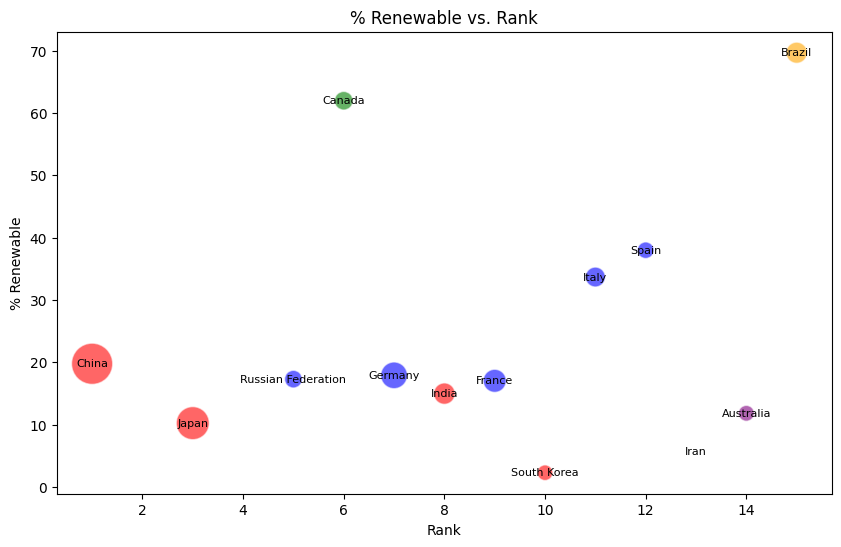

In [13]:
import matplotlib.pyplot as plt

colors = merged_df['Continent'].map({
    'Asia': 'red', 
    'Europe': 'blue', 
    'North America': 'green', 
    'Australia': 'purple', 
    'South America': 'orange'
})

plt.figure(figsize=(10, 6))
plt.scatter(
    merged_df['Rank'], 
    merged_df['% Renewable'], 
    s=merged_df['2015'] / 1e10, 
    c=colors, 
    alpha=0.6, 
    edgecolors='w'
)

for i, country in enumerate(merged_df.index):
    plt.text(
        merged_df['Rank'][i], 
        merged_df['% Renewable'][i], 
        country, 
        fontsize=8, 
        ha='center', 
        va='center'
    )

plt.title('% Renewable vs. Rank')
plt.xlabel('Rank')
plt.ylabel('% Renewable')
plt.savefig('bubble_chart_with_labels.png', dpi=300)
plt.show()


# 14

In [14]:
merged_df['Self-Citations Ratio'] = merged_df['Self-citations'] / merged_df['Citations']
country = merged_df['Self-Citations Ratio'].idxmax()
value = merged_df['Self-Citations Ratio'].max()
country, value


('China', 0.6893126179389422)

# 15

In [15]:
merged_df['Documents per Person'] = merged_df['Documents'] / merged_df['Estimated Population']
merged_df['Documents per Person'].mean()


0.000197070475732769